In [55]:
#Importing Libraries and Packages
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import requests
from io import StringIO
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [79]:
#Reading in Dataframe from project github repository
url_train = 'https://raw.githubusercontent.com/JSchlangen9/News-Classification/main/BBC%20News%20Train.csv'
url_test = 'https://raw.githubusercontent.com/JSchlangen9/News-Classification/main/BBC%20News%20Test.csv'
file_train = requests.get(url_train)
file_test = requests.get(url_test)
string_train = StringIO(file_train.text)
string_test = StringIO(file_test.text)

df_train = pd.read_csv(string_train)
df_test = pd.read_csv(string_test)

(array([336.,   0., 261.,   0.,   0., 274.,   0., 346.,   0., 273.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

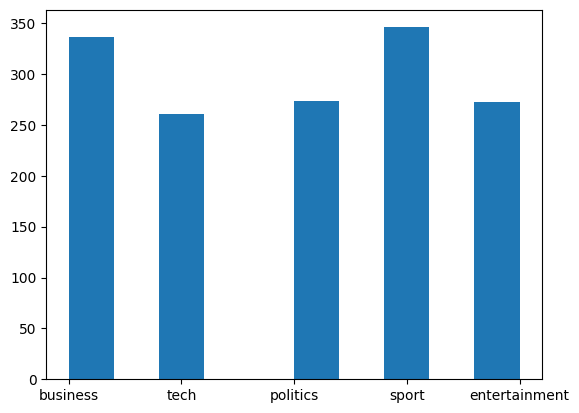

In [63]:
plt.hist(df_train['Category'])


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, 'to'),
  Text(1, 0, 'the'),
  Text(2, 0, 'in'),
  Text(3, 0, 'of'),
  Text(4, 0, 'she'),
  Text(5, 0, 'we'),
  Text(6, 0, 'bank'),
  Text(7, 0, 'o'),
  Text(8, 0, 'ssl'),
  Text(9, 0, 'life'),
  Text(10, 0, 'mitsubishi'),
  Text(11, 0, 'a'),
  Text(12, 0, 'and'),
  Text(13, 0, 'v'),
  Text(14, 0, '(leinster)'),
  Text(15, 0, 'that'),
  Text(16, 0, 's'),
  Text(17, 0, 'is'),
  Text(18, 0, 'children'),
  Text(19, 0, 'he'),
  Text(20, 0, 'sizzla'),
  Text(21, 0, 'i'),
  Text(22, 0, 'nissan'),
  Text(23, 0, 'microsoft'),
  Text(24, 0, 'johnson'),
  Text(25, 0, 'number'),
  Text(26, 0, 'they'),
  Text(27, 0, 'was'),
  Text(28, 0, 'mci'),
  Text(29, 0, '-'),
  Text(30, 0, 'arrested'),
  Text(31, 0, 'absa'),
  Text(32, 0, 'sales'),
  Text(33, 0, 'for'),
  Text(34, 0, 'mr')])

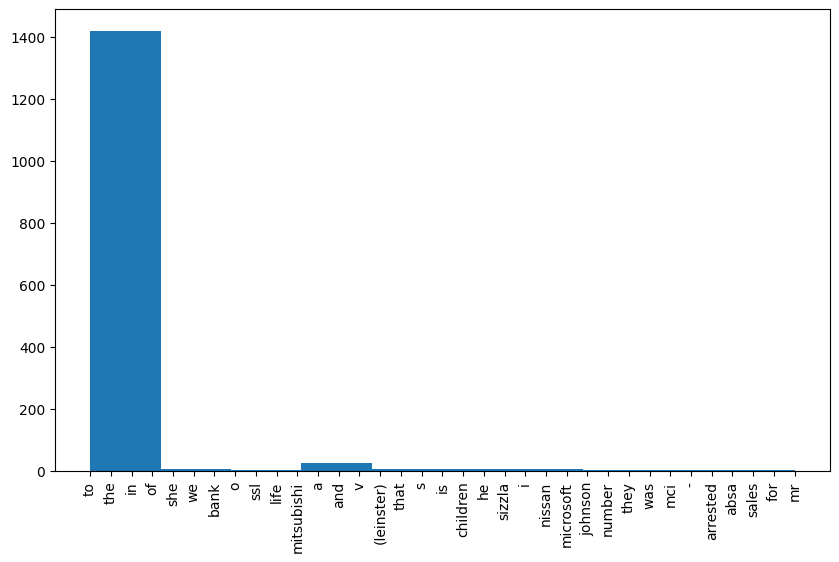

In [100]:
commons = []
for i in range(len(df_train)):
    string = df_train.iloc[i]['Text']
    split_it = string.split()
    word_count = Counter(split_it)
    most_occur = word_count.most_common()[0][0]
    commons.append(most_occur)

df_train['most_common'] = commons

plt.figure(figsize=(10,6))
plt.hist(df_train['most_common'])
plt.xticks(rotation=90)